In [1]:
import starry

In [2]:
import theano
theano.config.gcc__cxxflags += " -fexceptions"

In [3]:
starry.config.lazy = False

In [4]:
map = starry.Map(ydeg=5)

Pre-computing some matrices... Done.


In [5]:
map.y

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [6]:
map.intensity(lat=0,lon=0)

Compiling `intensity`... Done.


array([0.31830989])

Compiling `render`... Done.


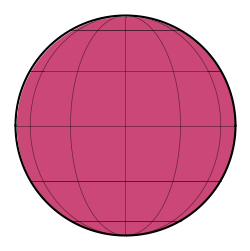

In [7]:
map.show()

In [8]:
import numpy as np

np.pi * 1.0 ** 2 * map.intensity(lat=0, lon=0)

array([1.])

In [ ]:
# Setting map coefficients
map[5, -3] = -2

Compiling `set_vector`...

 Done.


In [10]:
map.y

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

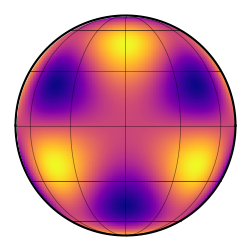

In [11]:
map.show()

In [12]:
map.intensity(lat=0,lon=0)

array([0.31830989])

In [13]:
theta = np.linspace(0, 360, 50)


Making an animation

In [14]:
import matplotlib as mpl
# mpl.rcParams['animation.ffmpeg_path'] = '~/miniconda3/envs/starry-env-fromgit/bin/ffmpeg'


In [15]:
map.show(theta=theta)

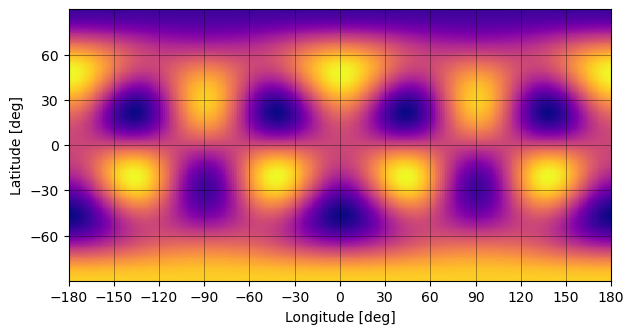

In [16]:
map.show(projection="rect")

## Loading map images

Pre-computing some matrices... Done.
Compiling `P`...

 Done.
Compiling `render`... Done.


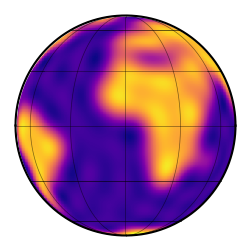

In [17]:
map=starry.Map(ydeg=20)
map.load("earth",sigma=0.08)
map.show()

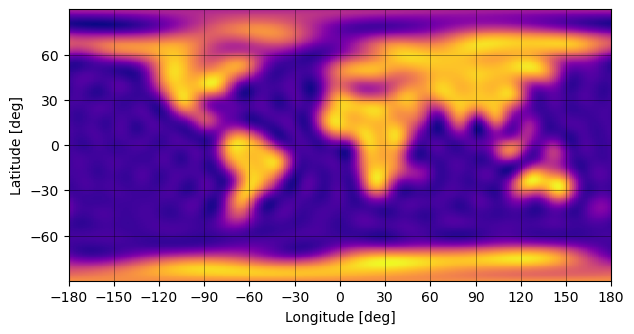

In [18]:
map.show(projection="rect")

Changing the orientation

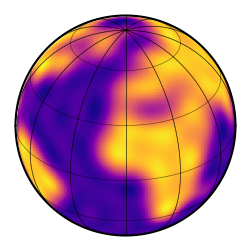

In [19]:
map.obl = 0
map.inc = 60.0
map.show()

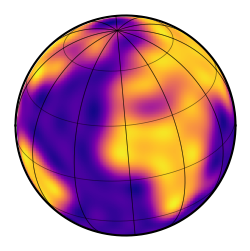

In [20]:
map.obl = 5
map.inc = 60.0
map.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

Compiling `intensity`...

 Done.


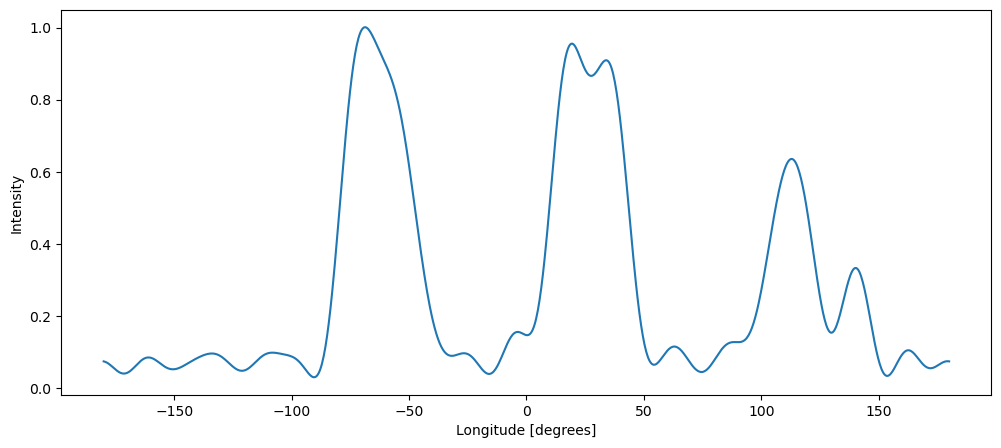

In [22]:
lon = np.linspace(-180, 180, 1000)
I = map.intensity(lat=0, lon=lon)
fig = plt.figure(figsize=(12, 5))
plt.plot(lon, I)
plt.xlabel("Longitude [degrees]")
plt.ylabel("Intensity");

## FLUX: Phase Curves

Compiling `flux`...

 Done.


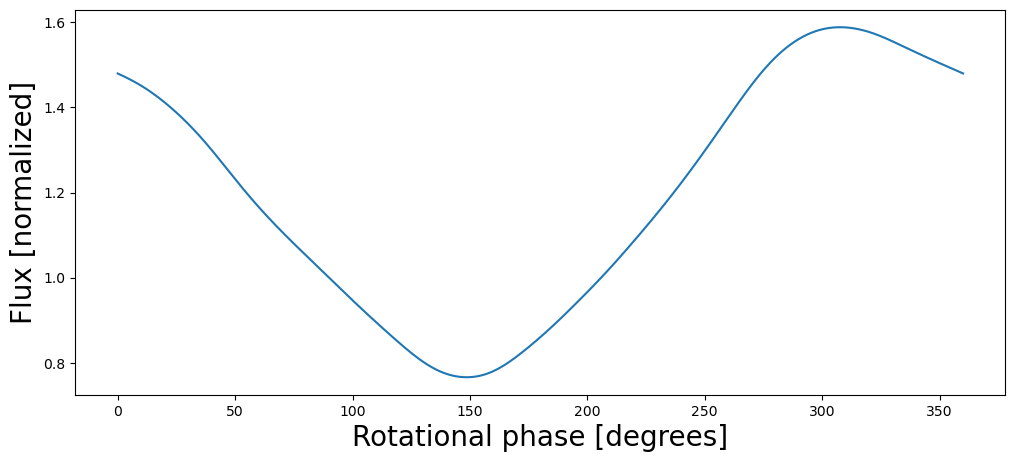

In [23]:
theta = np.linspace(0, 360, 1000)
plt.figure(figsize=(12, 5))
plt.plot(theta, map.flux(theta=theta))
plt.xlabel("Rotational phase [degrees]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20);

In [24]:
map.show(theta=np.linspace(0, 360, 50))

In [25]:
map.obl=0

## Flux: Transits and Occultations

In [26]:
print(map.flux.__doc__)


        Compute and return the light curve.

        Args:
            xo (scalar or vector, optional): x coordinate of the occultor
                relative to this body in units of this body's radius.
            yo (scalar or vector, optional): y coordinate of the occultor
                relative to this body in units of this body's radius.
            zo (scalar or vector, optional): z coordinate of the occultor
                relative to this body in units of this body's radius.
            ro (scalar, optional): Radius of the occultor in units of
                this body's radius.
            theta (scalar or vector, optional): Angular phase of the body
                in units of :py:attr:`angle_unit`.
            integrated (bool, optional): If True, dots the flux with the
                amplitude. Default False, in which case this returns a
                2d array (wavelength-dependent maps only).
        


Pre-computing some matrices... Done.
Compiling `P`... Done.
Compiling `flux`... Done.


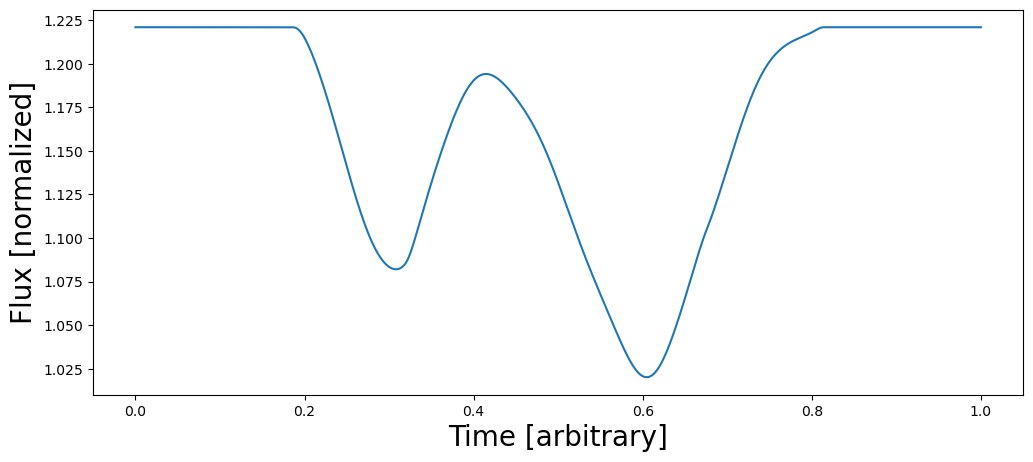

In [27]:
# Set the occultor trajectory
npts = 1000
time = np.linspace(0, 1, npts)
xo = np.linspace(-2.0, 2.0, npts)
yo = np.linspace(-0.3, 0.3, npts)
zo = 1.0
ro = 0.272

# Load the map of the Earth
map = starry.Map(ydeg=20)
map.load("earth", sigma=0.08)

# Compute and plot the light curve
plt.figure(figsize=(12, 5))
flux_moon = map.flux(xo=xo, yo=yo, ro=ro, zo=zo)
plt.plot(time, flux_moon)
plt.xlabel("Time [arbitrary]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20);

Compiling `render`...

 Done.


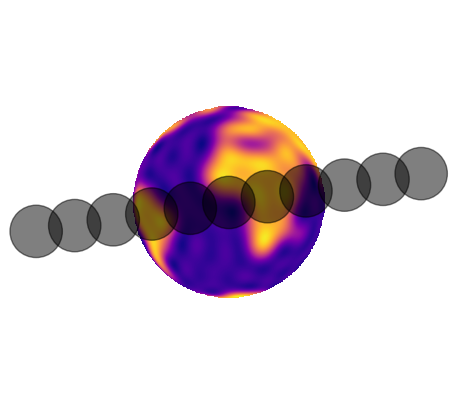

In [28]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.axis("off")
ax.imshow(map.render(), origin="lower", cmap="plasma", extent=(-1, 1, -1, 1))
for n in list(range(0, npts, npts // 10)) + [npts - 1]:
    circ = plt.Circle(
        (xo[n], yo[n]), radius=ro, color="k", fill=True, clip_on=False, alpha=0.5
    )
    ax.add_patch(circ)

Flux: Limb-darkening

In [29]:
map = starry.Map(udeg=2)

In [30]:
map[1] = 0.5
map[2] = 0.25

Compiling `set_vector`...

 Done.


Compiling `render_ld`... Done.


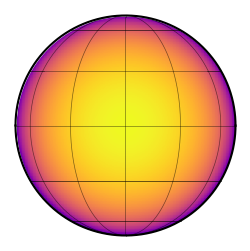

In [31]:
map.show()

Compiling `flux`...

 Done.


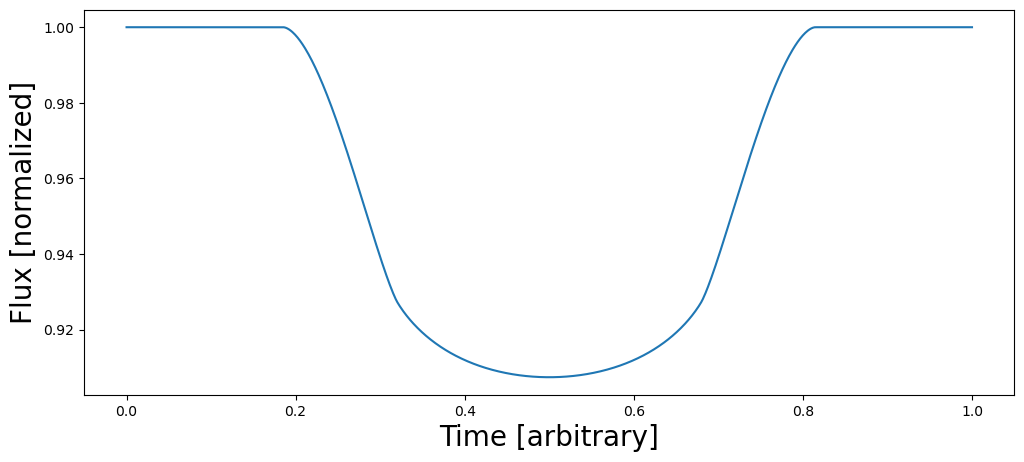

In [32]:
# Set the occultor trajectory
npts = 1000
time = np.linspace(0, 1, npts)
xo = np.linspace(-2.0, 2.0, npts)
yo = np.linspace(-0.3, 0.3, npts)
zo = 1.0
ro = 0.272

# Compute and plot the light curve
plt.figure(figsize=(12, 5))
plt.plot(time, map.flux(xo=xo, yo=yo, ro=ro, zo=zo))
plt.xlabel("Time [arbitrary]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20);

Pre-computing some matrices... Done.
Compiling `P`... Done.
Compiling `set_vector`... Done.
Compiling `render`... Done.


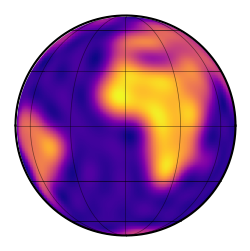

In [33]:
map = starry.Map(ydeg=20, udeg=2)
map.load("earth", sigma=0.08)
map[1] = 0.5
map[2] = 0.25
map.show()

Compiling `flux`...

 Done.


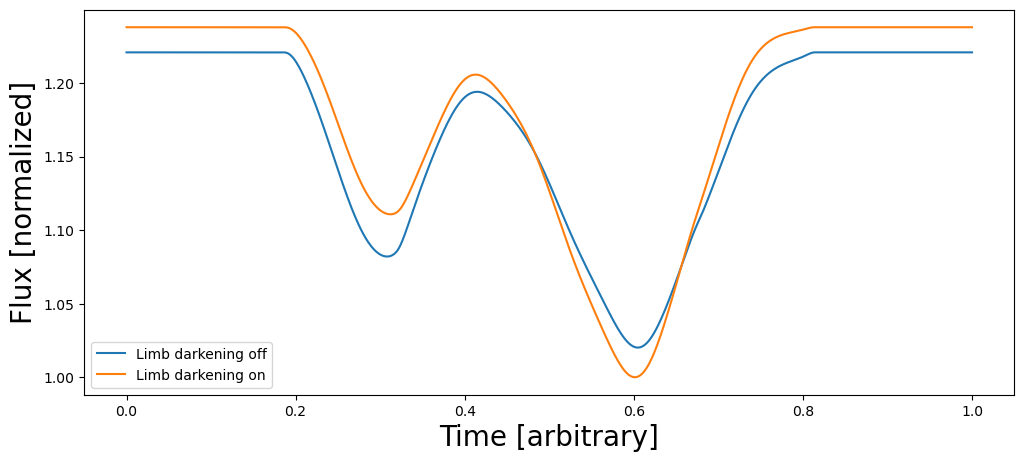

In [34]:
# Set the occultor trajectory
npts = 1000
time = np.linspace(0, 1, npts)
xo = np.linspace(-2.0, 2.0, npts)
yo = np.linspace(-0.3, 0.3, npts)
zo = 1.0
ro = 0.272

# Set the map inclination and obliquity
map.inc = 90
map.obl = 0

# Compute and plot the light curve
plt.figure(figsize=(12, 5))
plt.plot(time, flux_moon, label="Limb darkening off")
plt.plot(time, map.flux(xo=xo, yo=yo, ro=ro, zo=zo), label="Limb darkening on")
plt.xlabel("Time [arbitrary]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20)
plt.legend()